In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_worker_oc = pd.read_pickle("imr/0527-df_worker_oc.pkl.zst", compression='zstd').rename(columns={
    'worker.data.webgl2': 'webgl2',
    'worker.data.2d': '2d',
    'worker.data.webgl': 'webgl',
})
df_frame_oc = pd.read_pickle("imr/0527-df_frame_oc.pkl.zst", compression='zstd').rename(columns={
    'frame.data.webgl2': 'webgl2',
    'frame.data.2d': '2d',
    'frame.data.webgl': 'webgl',
})

df_worker_oc['type'] = 'worker'
df_frame_oc['type'] = 'main'

FileNotFoundError: [Errno 2] No such file or directory: 'imr/0527-df_worker_oc.pkl.zst'

In [ ]:
df = pd.concat([
    df_worker_oc.drop_duplicates(subset=['url'])[['webgl2', 'webgl', 'type']],
    df_frame_oc.drop_duplicates(subset=['url'])[['webgl2', 'webgl', 'type']]
])

In [ ]:
sns.set_context("paper", font_scale=2)
sns.set_palette("deep")

In [ ]:
df

,webgl2,webgl,type
2969,0.0,0.0,worker
3947,0.0,0.0,worker
7048,0.0,0.0,worker
8176,0.0,0.0,worker
8586,0.0,0.0,worker
...,...,...,...
105269,0.0,0.0,main
105271,0.0,0.0,main
105283,0.0,0.0,main
105332,0.0,0.0,main


<Figure size 1152x864 with 0 Axes>

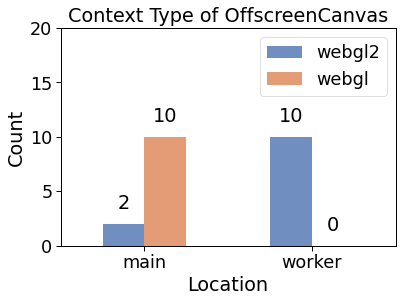

In [ ]:
plt.figure(figsize=(16, 12))

# Group the DataFrame by "type" and sum the other columns
grouped_df = df.groupby('type').sum()

# Plot a bar chart with "type" as the hue
ax = grouped_df.plot(kind='bar', rot=0, title='Context Type of OffscreenCanvas', ylabel='Count', xlabel='Location', alpha=0.8)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height() + 1), ha='center', va='bottom')
plt.ylim((0, 20))
plt.savefig('fig/results_oc_type.pdf', bbox_inches='tight')

In [ ]:
tmp = df_worker_oc[df_worker_oc['webgl2'] > 0]
tmp.drop_duplicates(subset=['url'])

,url,date,worker.url,webgl2,2d,webgl,type
22075,https://olvia-center.ru/contacts,1683327847659,https://fidirikosgroup.gr/wp-content/plugins/r...,1.0,1.0,0.0,worker
26317,https://stashlukhvac.com/,1683335417352,https://halorentals.com.au/wp-content/plugins/...,1.0,1.0,0.0,worker
26318,https://stategisportal.nic.in/,1683335448957,https://halorentals.com.au/wp-content/plugins/...,1.0,1.0,0.0,worker
27010,https://thingmap.thingjs.com/,1683358201996,https://ics-web.jp/assets/topHero/worker.js,1.0,1.0,0.0,worker
27692,https://umsflowell.com/case-histories/,1683294490619,https://ito-photo.com/wp-content/plugins/rhye-...,1.0,1.0,0.0,worker
27694,https://umsflowell.com/casing-isolation-with-r...,1683294527809,https://ito-photo.com/wp-content/plugins/rhye-...,1.0,1.0,0.0,worker
27695,https://umsflowell.com/downhole-animations/,1683294561265,https://ito-photo.com/wp-content/plugins/rhye-...,1.0,1.0,0.0,worker
27717,https://umsflowell.com/rental-equipment/,1683294651376,https://ito-photo.com/wp-content/plugins/rhye-...,1.0,1.0,0.0,worker
34056,https://www.grandts.com/john-grandt-job-historie/,1683287620047,https://osmolis.hr/wp-content/plugins/rhye-cor...,1.0,1.0,0.0,worker
40366,https://www.theambassadorplatform.com/pricing?...,1683299769823,https://tubladel.com/wp-content/plugins/rhye-c...,1.0,1.0,0.0,worker


In [ ]:
tmp['worker.url'].iloc[0]

'https://fidirikosgroup.gr/wp-content/plugins/rhye-core/modules/baseGLAnimationOffscreen/EffectDistortionOffscreen.js'

In [ ]:
tmp = df_frame_oc[df_frame_oc['webgl'] > 0]
print(tmp['url'].unique())
print(tmp['frame.url'].unique())

['http://satsumameijimura.jp/a/00000196_00000007'
 'http://www.ceuarkos.edu.mx/encuentros-pascal-galvani/'
 'http://www.latinmedios.com' 'https://bonkiogame.com/'
 'https://dayandnight.moar.io' 'https://gosenergy.com/open-an-account/'
 'https://hostida.com/blog/' 'https://www.einzigartig-evelynpoetz.at/'
 'https://www.iijima-sc.com/recruitment/index.html'
 'https://www.livehome.ne.jp/es/rent/1135932991140000480872']
['http://dali.dartmouth.edu/partners' 'https://www.gather.ai/'
 'http://www.innerspacevr.com/' 'https://www.theblazeprod.com/'
 'https://www.clicktorelease.com/code/cruciform/'
 'http://www.madronagallery.com/exhibitions/quvianaqtuk-pudlat-2022'
 'http://www.ncati.org/' 'https://celadonsoft.com/'
 'https://coloradotu.org/gofish' 'https://crushdepth.com/']


In [ ]:
tmp = df_frame_oc[df_frame_oc['webgl2'] > 0]
print(tmp['url'].unique())
print(tmp['frame.url'].unique())

['https://dayandnight.moar.io' 'https://www.galgame.pw/']
['https://www.clicktorelease.com/code/cruciform/'
 'https://chroma.metmuseum.org/']
